In [14]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from MyLogisticRegression import  LogisticRegression

In [15]:
iris = datasets.load_iris() # 鸢尾花数据集
data = iris.data
target = iris.target
data = data[target<2, :2] # 选取鸢尾花数据集中标签为0,1的前两个特征
target = target[target<2]

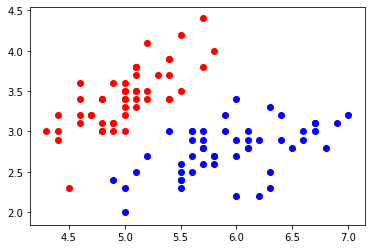

In [16]:
plt.scatter(data[target==0, 0], data[target==0, 1], color="red")
plt.scatter(data[target==1, 0], data[target==1, 1], color="blue")
plt.show() # 所取数据的可视化

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33)
log_reg = LogisticRegression()

In [18]:
log_reg.fit(X_train, y_train)

0.004279665850998638

In [19]:
log_reg.predict_proba(X_test)

array([1.08764578e-07, 2.81880705e-07, 1.38076982e-06, 9.99989089e-01,
       6.43202082e-07, 5.06656175e-08, 3.73500676e-09, 9.42398083e-07,
       9.99999788e-01, 1.15610043e-07, 9.99662374e-01, 4.81817733e-09,
       9.99999994e-01, 9.99997470e-01, 9.99999647e-01, 1.00000000e+00,
       1.00000000e+00, 1.92388144e-07, 9.97870366e-01, 9.99999086e-01,
       9.95982454e-01, 1.00000000e+00, 9.99999993e-01, 1.00000000e+00,
       8.72500933e-06, 2.37725056e-04, 4.85401056e-05, 1.37202186e-02,
       1.55660551e-10, 1.12552770e-05, 9.99999690e-01, 2.69995567e-04,
       5.06656175e-08])

In [20]:
log_reg.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [21]:
log_reg.score(X_test, y_test)

1.0

In [22]:
log_reg.intercept_ # 截距项

-45.602569875099434

In [23]:
log_reg.coef_ # 解释变量系数

array([ 18.43559696, -17.16236655])

In [24]:
def x2(x1):
    """绘制决策边界,即直线wx=0,越在直线wx=0上的点值越大,对应地属于类别1的概率越大"""
    return (-log_reg.coef_[0] * x1 - log_reg.intercept_) / log_reg.coef_[1]

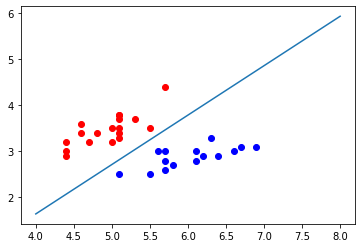

In [25]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color="red")
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color="blue")
plt.plot(x1_plot, x2_plot)
plt.show()

D:\CodeProgram\anconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


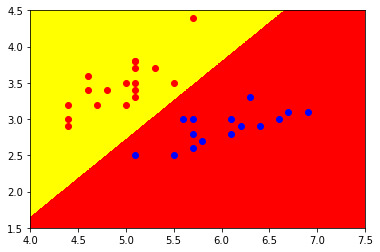

In [26]:
def plot_decision_boundary(model, 
                           axis): # 坐标轴范围
    """绘制决策边界""" 
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*200)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*200)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['yellow', 'red'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color="red")
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color="blue")
plt.show()